<a href="https://colab.research.google.com/github/CharizmaticWizard/Sign-Language-Detection/blob/master/SignLanguageRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf 
print(tf.version) 

In [ ]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

In [ ]:
from google.colab import files
mnist = files.upload()

In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(mnist['sign_mnist_train.csv']))
df2 = pd.read_csv(io.BytesIO(mnist['sign_mnist_test.csv']))

In [ ]:
display(df1.info())
display(df2.info())
display(df1.head(n = 2))
display(df2.head(n = 2))

In [ ]:
y_train = df1['label'].values
y_test = df2['label'].values

X_train = df1.drop(['label'],axis=1)
X_test = df2.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)

In [ ]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

In [ ]:
classifier.summary()

In [ ]:
from keras.utils.vis_utils import plot_model

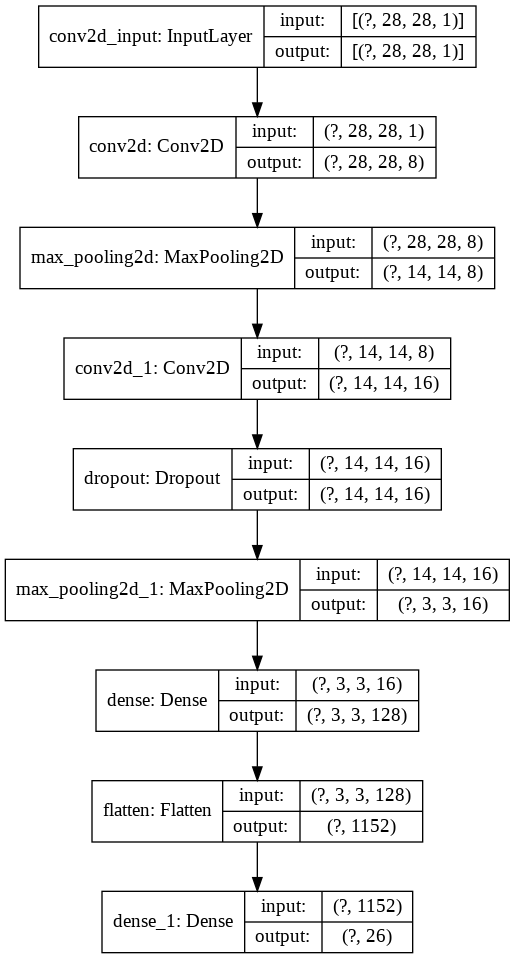

In [ ]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Double check with Python 3


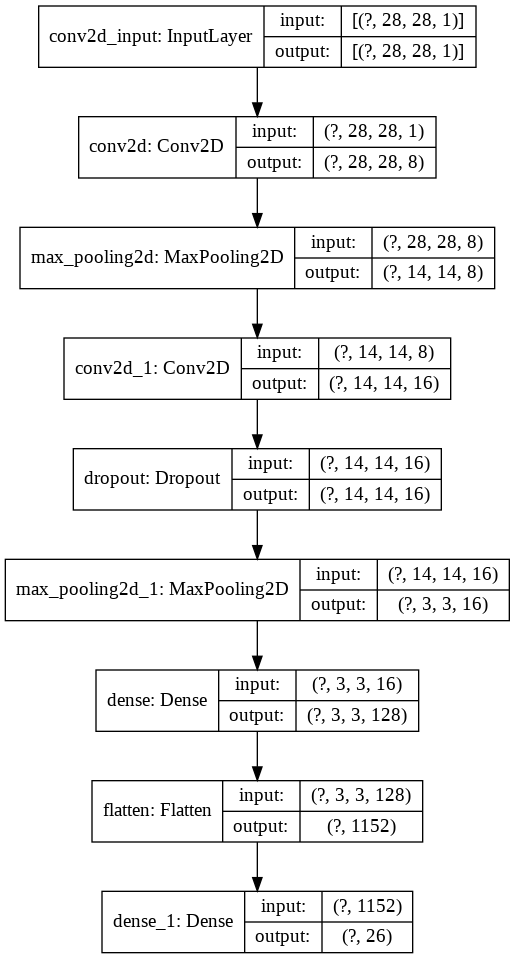

In [ ]:
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [ ]:
classifier.save('CNNmodel.h5')

In [ ]:
from google.colab import files
files.download("CNNmodel.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# Evaluating confusion matric 
res = tf.math.confusion_matrix(X_test,y_test) 
  
# Printing the result 
print('Confusion_matrix: ',res) 

InvalidArgumentError: ignored

In [ ]:
mat=confusion_matrix(X_test, y_test)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8), class_names=class_names, show_normed=True)

ValueError: ignored